In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Health Dataset 1 (N=2000)

In [35]:
patients_df = pd.read_csv("data/Health Dataset 1 (N=2000).csv", index_col="Patient_Number")

In [36]:
patients_df.head()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
Patient_Number,,,,,,,,,,,,,
1,1,11.28,0.90,34,23,1,1.0,0,48071,NaN,2,1,1
2,0,9.75,0.23,54,33,1,NaN,0,25333,205.0,3,0,0
3,1,10.79,0.91,70,49,0,NaN,0,29465,67.0,2,1,0
4,0,11.00,0.43,71,50,0,NaN,0,7439,242.0,1,0,0
5,1,14.17,0.83,52,19,0,NaN,0,49644,397.0,2,0,0


In [37]:
print("Shape of dataset:", patients_df.shape)
print("Duplicate rows:", patients_df.duplicated().sum())

Shape of dataset: (2000, 13)
Duplicate rows: 0


In [38]:
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1 to 2000
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Blood_Pressure_Abnormality     2000 non-null   int64  
 1   Level_of_Hemoglobin            2000 non-null   float64
 2   Genetic_Pedigree_Coefficient   1908 non-null   float64
 3   Age                            2000 non-null   int64  
 4   BMI                            2000 non-null   int64  
 5   Sex                            2000 non-null   int64  
 6   Pregnancy                      442 non-null    float64
 7   Smoking                        2000 non-null   int64  
 8   salt_content_in_the_diet       2000 non-null   int64  
 9   alcohol_consumption_per_day    1758 non-null   float64
 10  Level_of_Stress                2000 non-null   int64  
 11  Chronic_kidney_disease         2000 non-null   int64  
 12  Adrenal_and_thyroid_disorders  2000 non-null   int64 

### Handle missing data

In [39]:
# Calculate missing values percentage
missing_data = patients_df.isnull().sum() / len(patients_df) * 100
print(missing_data)

Blood_Pressure_Abnormality        0.0
Level_of_Hemoglobin               0.0
Genetic_Pedigree_Coefficient      4.6
Age                               0.0
BMI                               0.0
Sex                               0.0
Pregnancy                        77.9
Smoking                           0.0
salt_content_in_the_diet          0.0
alcohol_consumption_per_day      12.1
Level_of_Stress                   0.0
Chronic_kidney_disease            0.0
Adrenal_and_thyroid_disorders     0.0
dtype: float64


In [40]:
patients_df['Genetic_Pedigree_Coefficient'].fillna(patients_df['Genetic_Pedigree_Coefficient'].mean(), inplace=True)
patients_df['Pregnancy'].fillna(0, inplace=True) # Or remove woman rows with Nan values
patients_df['alcohol_consumption_per_day'].fillna(patients_df.groupby('Sex')['alcohol_consumption_per_day'].transform('mean'), inplace=True)

C:\Users\kulaw\AppData\Local\Temp\ipykernel_4972\4166388579.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  patients_df['Genetic_Pedigree_Coefficient'].fillna(patients_df['Genetic_Pedigree_Coefficient'].mean(), inplace=True)
C:\Users\kulaw\AppData\Local\Temp\ipykernel_4972\4166388579.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

In [41]:
patients_df.describe()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.493500,11.710035,0.494817,46.558500,30.081500,0.496000,0.099500,0.509500,24926.097000,250.996243,2.012500,0.356500,0.298000
std,0.500083,2.186701,0.284944,17.107832,11.761208,0.500109,0.299407,0.500035,14211.692586,134.676368,0.823822,0.479085,0.457494
min,0.000000,8.100000,0.000000,18.000000,10.000000,0.000000,0.000000,0.000000,22.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,10.147500,0.250000,32.000000,20.000000,0.000000,0.000000,0.000000,13151.750000,144.000000,1.000000,0.000000,0.000000
50%,0.000000,11.330000,0.494817,46.000000,30.000000,0.000000,0.000000,1.000000,25046.500000,250.367089,2.000000,0.000000,0.000000
75%,1.000000,12.945000,0.730000,62.000000,40.000000,1.000000,0.000000,1.000000,36839.750000,360.250000,3.000000,1.000000,1.000000
max,1.000000,17.560000,1.000000,75.000000,50.000000,1.000000,1.000000,1.000000,49976.000000,499.000000,3.000000,1.000000,1.000000


### EDA

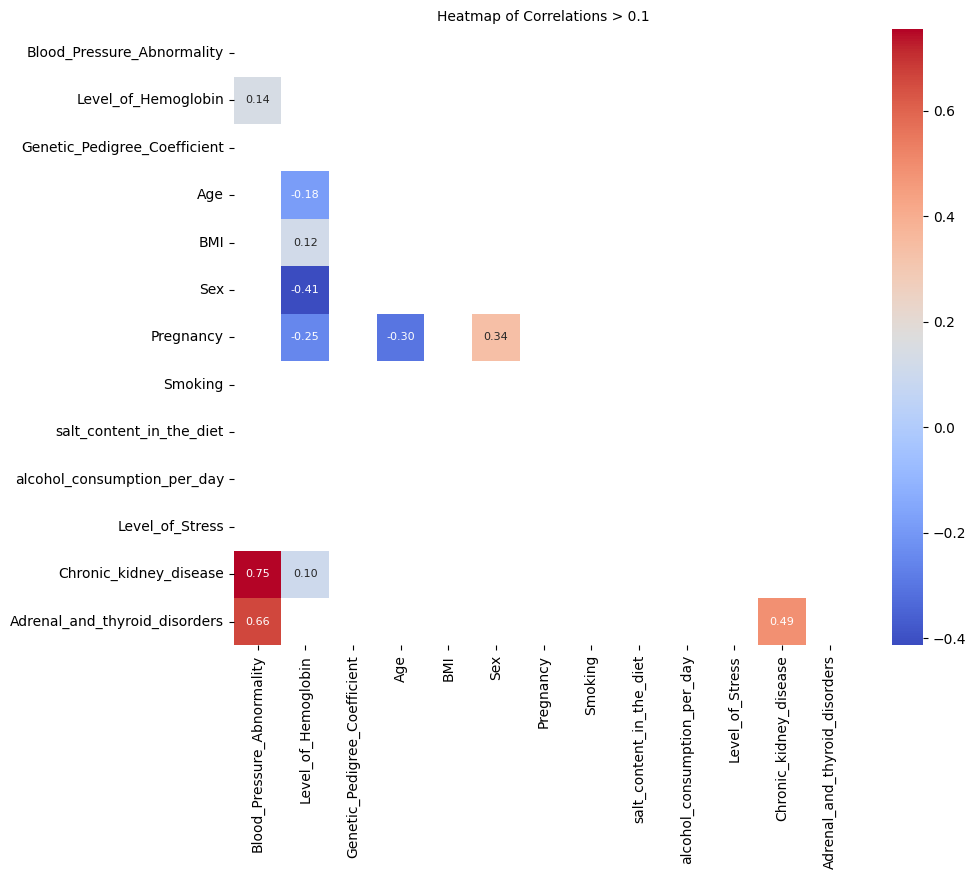

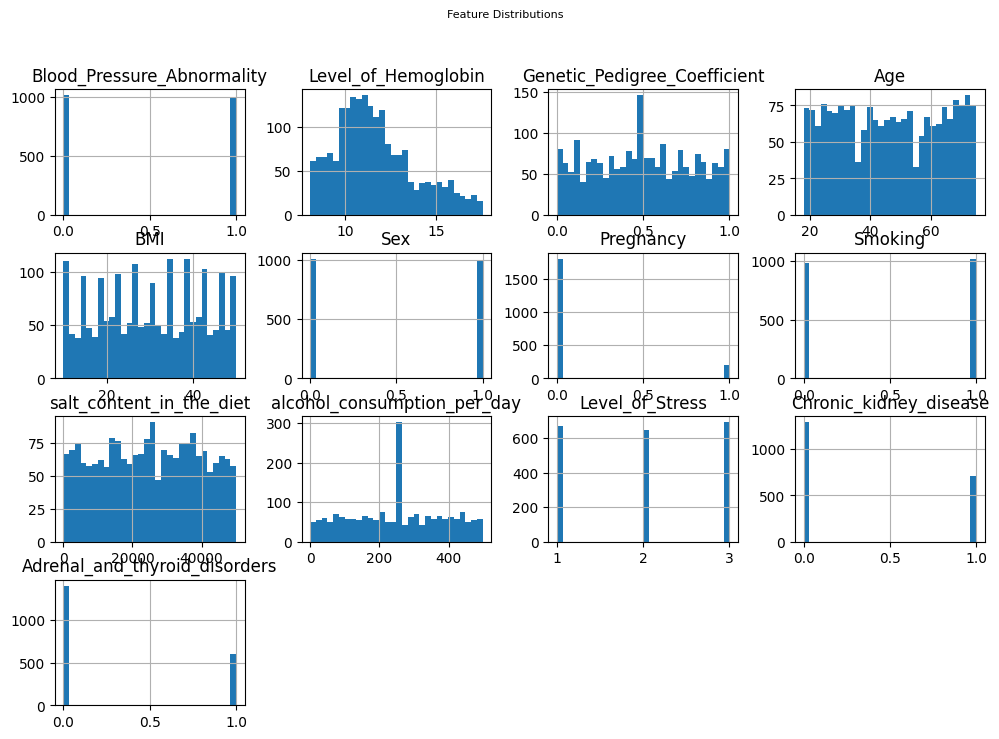

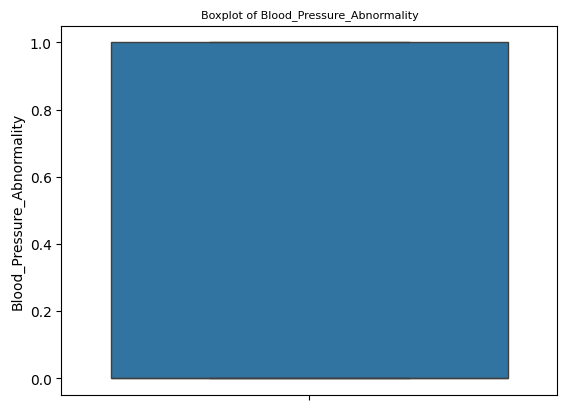

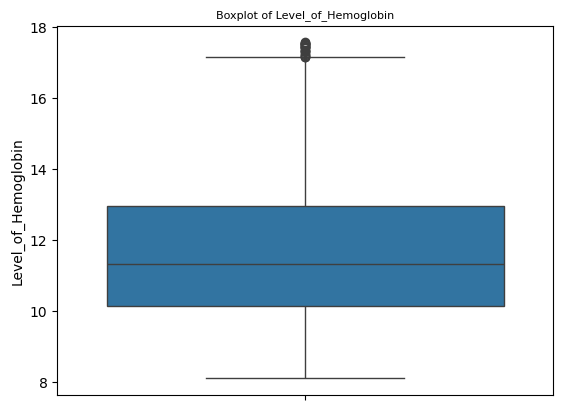

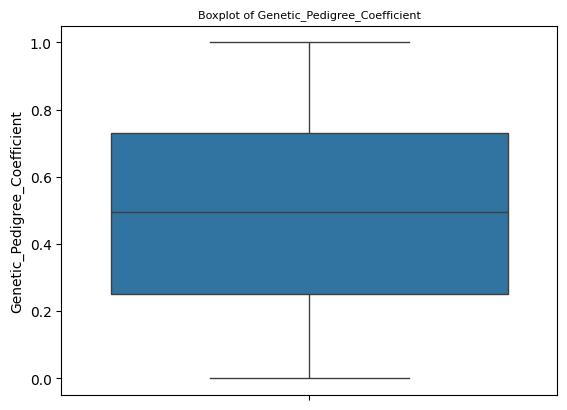

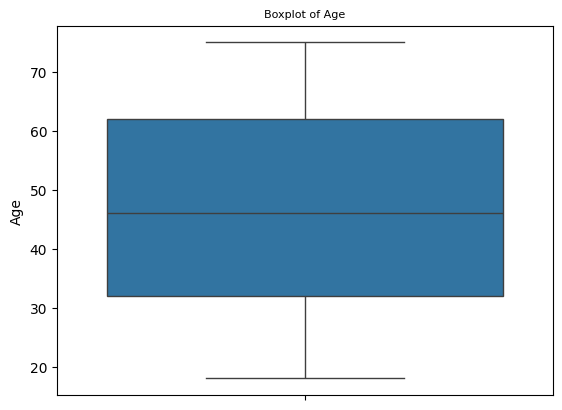

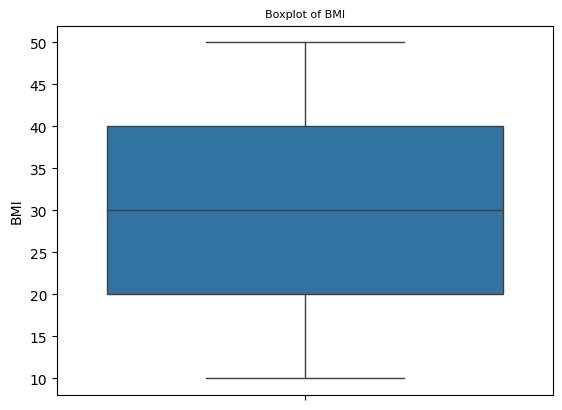

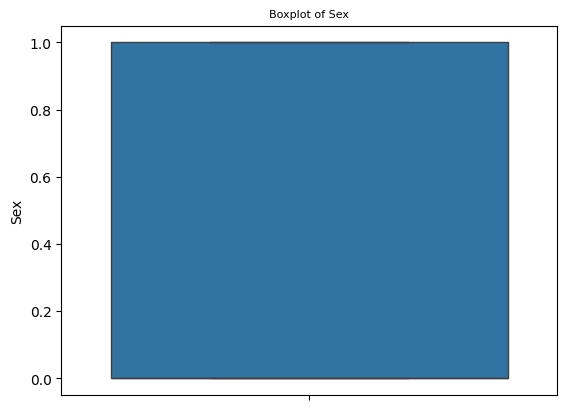

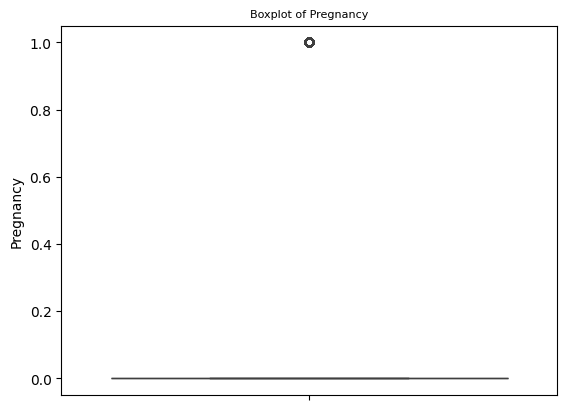

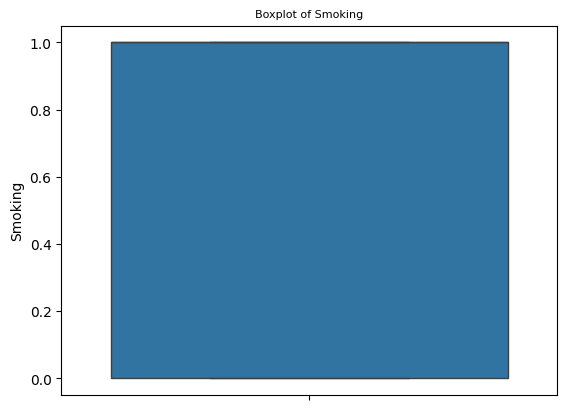

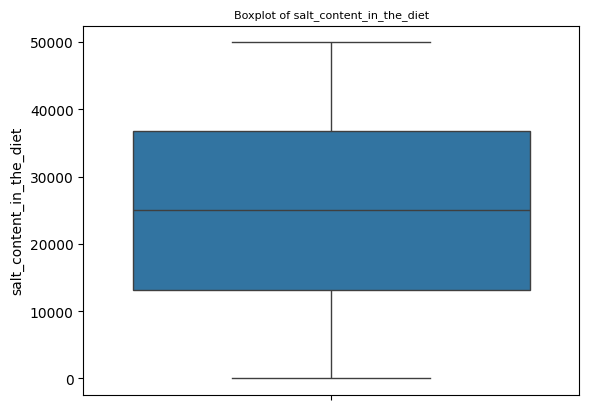

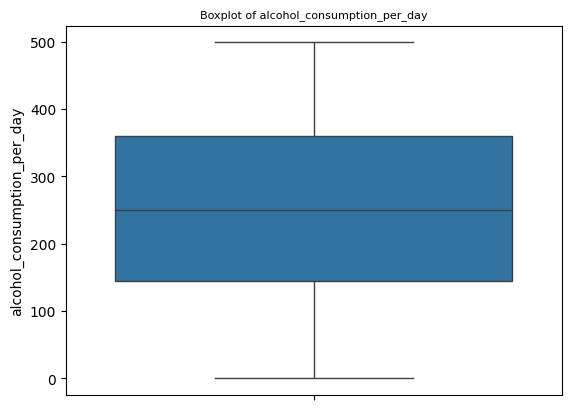

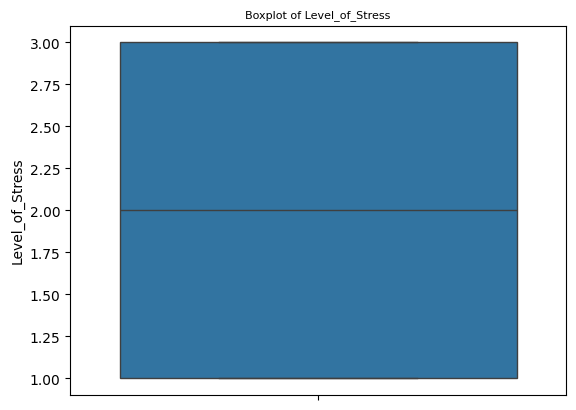

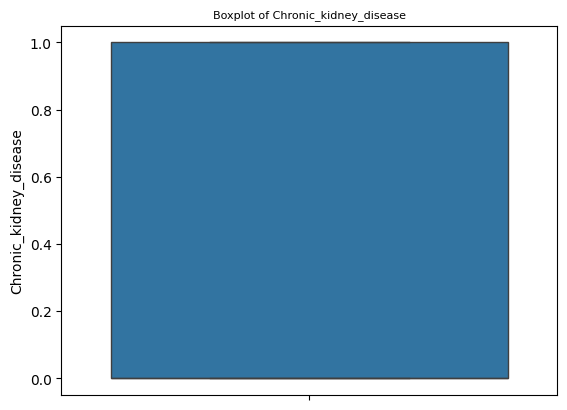

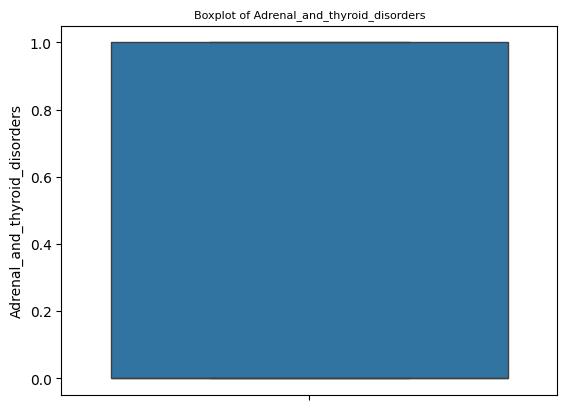

In [42]:
correlation_matrix = patients_df.corr()
filtered_corr = correlation_matrix[correlation_matrix.abs() > 0.1]
mask = np.triu(np.ones_like(filtered_corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, fmt=".2f", cmap="coolwarm", mask=mask, annot_kws={"size": 8})
plt.title("Heatmap of Correlations > 0.1", fontsize=10)
plt.show()

# Histograms with smaller title font
patients_df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions", fontsize=8)
plt.show()

# Boxplots with smaller title font
for col in patients_df.select_dtypes(include=['float64', 'int64']):
    sns.boxplot(patients_df[col])
    plt.title(f"Boxplot of {col}", fontsize=8)
    plt.show()

### Outliers

In [43]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = patients_df.select_dtypes(include=['float64', 'int64']).apply(zscore)

# Identify rows where Z-score > 3 for any column
outliers = (z_scores.abs() > 3).any(axis=1)

# Boolean mask of outlier columns for the rows
outlier_columns = (z_scores.abs() > 3).loc[outliers]

# Find unique column names with outliers
unique_columns_with_outliers = outlier_columns.any(axis=0)  # Identify columns with at least one outlier
unique_columns = unique_columns_with_outliers[unique_columns_with_outliers].index.tolist()

# Print unique column names
print("Columns with outliers:")
print(unique_columns)

Columns with outliers:
['Pregnancy']


- **Shape**: The dataset contains 2,000 rows and 13 columns.
- **Missing Values**: 
- - Column Genetic_Pedigree_Coefficient had 4.6% missing values, which were filled with the mean.
- - Column Pregnancy had 77.9% missing values, which were filled with the 0.
- - Column alcohol_consumption_per_day had 12.1% missing values, which were filled with the mean of the respective gender.
- **Outliers**: Pregnancy, but it isn't real outliers, because I set NaN to 0. 
- **Correlations**: Too many to list all the correlations. They can be seen on the heatmap of correlations. 

In [44]:
patients_df.to_csv("data/cleaned_patients.csv", index=True)

# Health Dataset 2 (N=20000)

In [14]:
activity_df = pd.read_csv("data/Health Dataset 2 (N=20000).csv")

In [15]:
activity_df.head()

,Patient_Number,Day_Number,Physical_activity
0,1,1,23590.0
1,1,2,10411.0
2,1,3,7815.0
3,1,4,12366.0
4,1,5,NaN


In [16]:
print("Shape of dataset:", activity_df.shape)
print("Duplicate rows:", activity_df.duplicated().sum())

Shape of dataset: (20000, 3)
Duplicate rows: 0


In [17]:
activity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_Number     20000 non-null  int64  
 1   Day_Number         20000 non-null  int64  
 2   Physical_activity  16159 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 468.9 KB


### Handle missing data

In [18]:
# Calculate missing values percentage
missing_data = activity_df.isnull().sum() / len(activity_df) * 100
print(missing_data)

Patient_Number        0.000
Day_Number            0.000
Physical_activity    19.205
dtype: float64


In [19]:
# Group by 'Patient_Number' and fill missing values with the median of the group
activity_df['Physical_activity'] = activity_df.groupby('Patient_Number')['Physical_activity'].transform(lambda x: x.fillna(x.mean()))

In [20]:
activity_df.describe()

,Patient_Number,Day_Number,Physical_activity
count,20000.000000,20000.000000,20000.000000
mean,1000.500000,5.500000,25329.715754
std,577.364631,2.872353,9049.438984
min,1.000000,1.000000,628.000000
25%,500.750000,3.000000,19835.875000
50%,1000.500000,5.500000,25376.500000
75%,1500.250000,8.000000,30834.000000
max,2000.000000,10.000000,49980.000000


### EDA

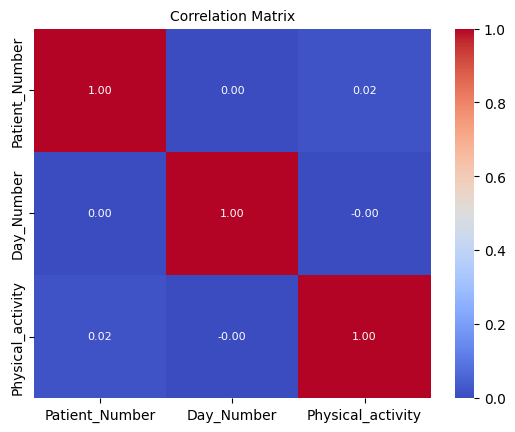

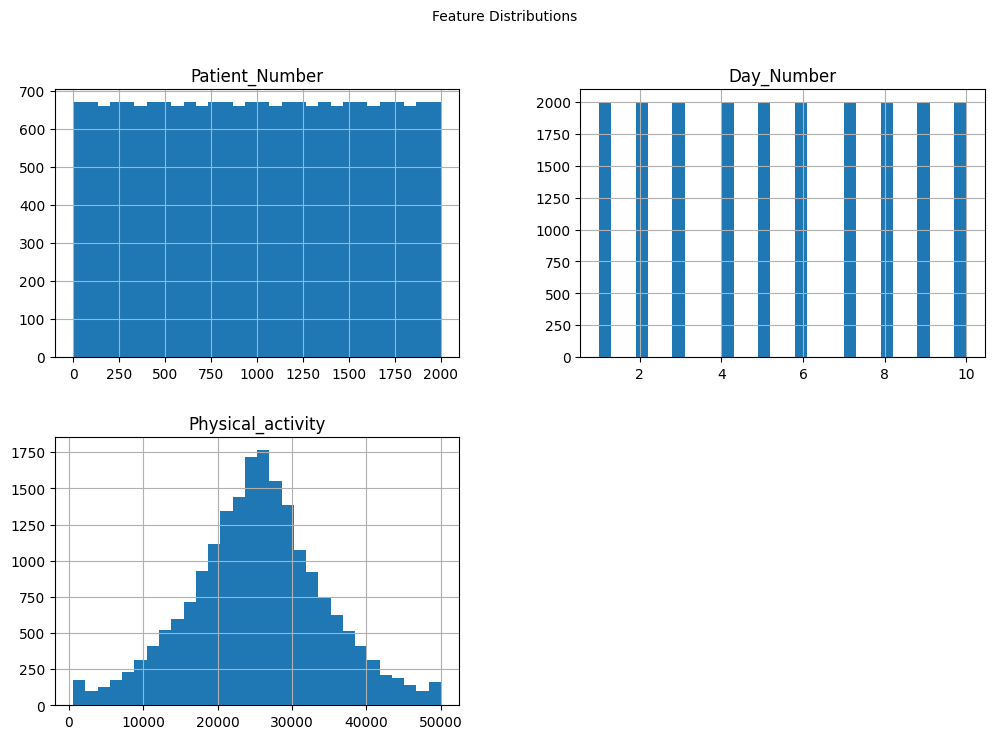

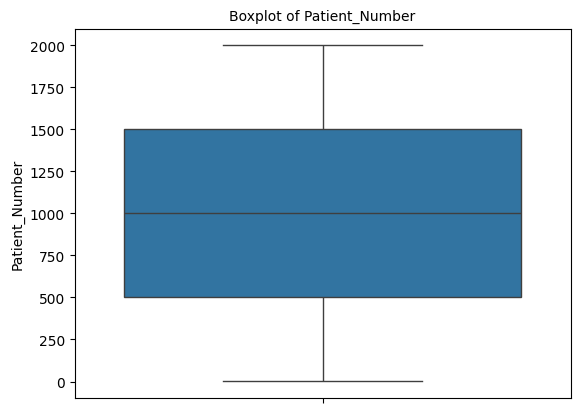

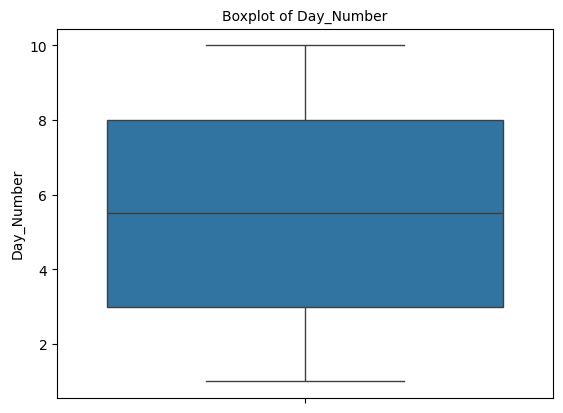

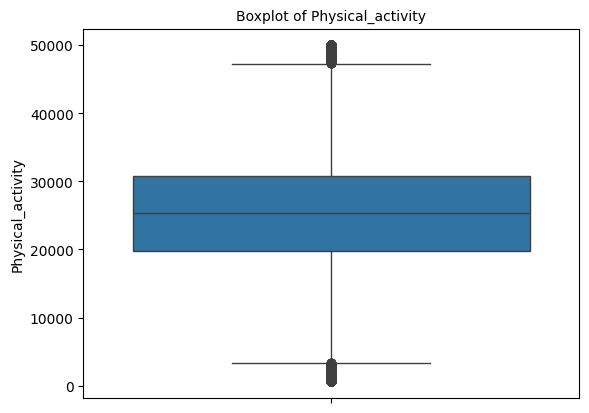

In [21]:
# Heatmap with smaller font size for annotations and title
sns.heatmap(activity_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 8})
plt.title("Correlation Matrix", fontsize=10)
plt.show()

# Histograms with smaller title font
activity_df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions", fontsize=10)
plt.show()

# Boxplots with smaller title font
for col in activity_df.select_dtypes(include=['float64', 'int64']):
    sns.boxplot(activity_df[col])
    plt.title(f"Boxplot of {col}", fontsize=10)
    plt.show()

### Outliers

In [22]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = activity_df.select_dtypes(include=['float64', 'int64']).apply(zscore)

# Identify rows where Z-score > 3 for any column
outliers = (z_scores.abs() > 3).any(axis=1)

# Boolean mask of outlier columns for the rows
outlier_columns = (z_scores.abs() > 3).loc[outliers]

# Find unique column names with outliers
unique_columns_with_outliers = outlier_columns.any(axis=0)  # Identify columns with at least one outlier
unique_columns = unique_columns_with_outliers[unique_columns_with_outliers].index.tolist()

# Print unique column names
print("Columns with outliers:")
print(unique_columns)

Columns with outliers:
[]


### Create Pivot Table

In [31]:
activity_pivot_df = activity_df.pivot(index='Patient_Number', columns='Day_Number', values='Physical_activity')
activity_pivot_df.columns = [f'Physical_activity_day_{col}' for col in activity_pivot_df.columns]
activity_pivot_df.reset_index(inplace=True)
activity_pivot_df.head()

,Patient_Number,Physical_activity_day_1,Physical_activity_day_2,Physical_activity_day_3,Physical_activity_day_4,Physical_activity_day_5,Physical_activity_day_6,Physical_activity_day_7,Physical_activity_day_8,Physical_activity_day_9,Physical_activity_day_10
0,1,23590.0,10411.000000,7815.000000,12366.000000,23295.888889,30319.000000,46225.000000,40988.000000,10540.000000,27409.0
1,2,34928.0,27963.625000,39409.000000,19205.000000,26894.000000,11518.000000,27963.625000,19584.000000,37076.000000,35095.0
2,3,31479.0,8537.000000,22868.571429,20167.000000,26392.000000,22868.571429,32602.000000,22868.571429,28268.000000,12635.0
3,4,31666.0,28919.428571,28919.428571,39404.000000,24287.000000,30045.000000,23975.000000,27817.000000,28919.428571,25242.0
4,5,21581.0,32782.000000,21660.333333,21660.333333,21660.333333,34077.000000,21660.333333,11236.000000,10563.000000,19723.0


- **Shape**: The dataset contains 20,000 rows and 3 columns.
- **Missing Values**: 
- - Column Physical_activity had 19.205% missing values, which were filled with the mean.
- **Outliers**: No
- **Correlations**: No

In [32]:
activity_pivot_df.to_csv("data/cleaned_activity.csv", index=False)

In [45]:
!jupyter nbconvert --to html data_analyse.ipynb

[NbConvertApp] Converting notebook data_analyse.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 20 image(s).
[NbConvertApp] Writing 879280 bytes to data_analyse.html
